# Working with Missing Data

## Step 1:
Use sklearn.datasets to get the Boston Housing dataset.
Fit a linear regressor to the data as a baseline.  There is no need to do Cross-Validation.  We will simply be exploring the change in results.

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# load boston housing dataset
boston = load_boston()

# convert array to dataframe
data = pd.DataFrame(boston.data, columns=boston.feature_names)

# add median home value
data['MEDVAL'] = boston.target

In [3]:
# show data description
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# preview data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

# EDA

In [6]:
data.describe().round(decimals=2).to_csv('describe.csv')
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDVAL     False
dtype: bool

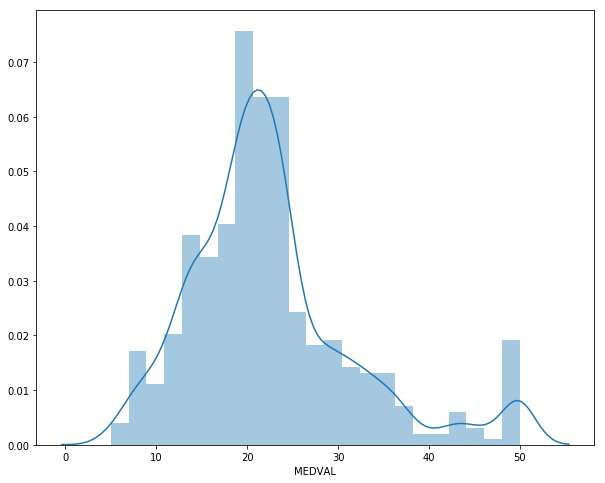

In [8]:
###The distribution of the target:
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.distplot(data['MEDVAL'])
plt.savefig('dist.png')

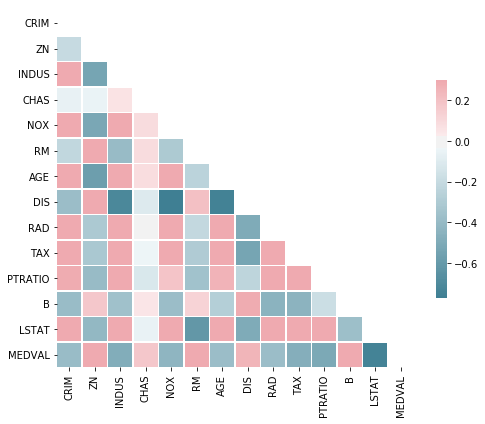

In [9]:
corr = data.corr()
plt.figure(figsize=(8,8))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('heatmap.png')

### Question 1: 
What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison.

## Step 2: (repeat for each percentage value below) 

Select 1%, 5% 10%, 20%, 33%, and 50% of your data in a single column [hold that column selection constant throughout all iterations] (Completely at random), replace the original value with a NaN (i.e., “not a number” – ex., np.nan) and then perform an imputation for the missing values.   

### Question 2: 
In each case [1%, 5%, 10%, 20%, 33%, 50%] perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.  [Note: you should have (6) models to compare against your baseline at this point.]

In [10]:
#Adding the fractions to which we null the data
#0% 1%, 5% 10%, 20%, 33%, and 50%
fractions = np.array([0, 1, 5, 10, 20, 33, 50]) / 100

# Randomly select a column
feat_cols = data.columns[:-1]
col = np.random.choice(feat_cols, 1)[0]

print('Column used for adding NaNs:', col)
print('% used for NULLing out Date:', fractions)

Column used for adding NaNs: RM
% used for NULLing out Date: [0.   0.01 0.05 0.1  0.2  0.33 0.5 ]


In [11]:
def add_nulls(df, frac, col):
    # Get the non missing values
    df_notna = df[~df[col].isna()]
    
    # Randomly sample of frac from the non missing values
    n_rand = int(frac * df.shape[0])
    rand_indices = np.random.choice(df_notna.index, n_rand, replace=False)
    #rand_indices = df_notna.sample(frac=frac).index
    
    # Set the col values at the inndices to null
    df.loc[rand_indices, col] = np.nan
    
    return df

In [12]:
def median_impute(df, col):
    _df = df_with_na.copy()
    
    # Impute using median value
    median = _df[col].median()
    _df[col].fillna(median, inplace=True)
    
    return _df

In [13]:
df_with_na = data.copy()
for frac in np.ediff1d(fractions):
    # Add incremental fractional nulls
    df_with_na = add_nulls(df_with_na, frac, col)
    
    # Impute using median value
    df_imputed = median_impute(df_with_na, col)
    
    print(df_with_na[[col]].dropna().shape)
    print(df_imputed[[col]].dropna().shape)
    print()

(501, 1)
(506, 1)

(481, 1)
(506, 1)

(456, 1)
(506, 1)

(406, 1)
(506, 1)

(341, 1)
(506, 1)

(255, 1)
(506, 1)



In [14]:
label_col = 'MEDVAL'

In [15]:
# MAE, MSE, RMSE, R2
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return [mae, mse, rmse, r2]

In [16]:
def prepare_data(df, label_col):
    # Extract the features and labels
    X = df.drop(columns=label_col)
    y = df[label_col]
    
    # Split train and test dataset
    return train_test_split(X, y, test_size=0.3)

In [17]:
def fit_data(df, label_col):
    # LR model
    lr = LinearRegression()
    
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data(df, label_col)
    
    # Fit model on training data
    lr.fit(X_train, y_train)
    
    # Evaluate model using test data
    y_pred = lr.predict(X_test)
    metrics = compute_metrics(y_test, y_pred)
    
    return metrics

In [18]:
def summarize_results(fractions, base_results, results, return_diff=True):
    # Get the actual fractions
    fracs = np.ediff1d(fractions).cumsum()[:, None]
    
    # Get the base base summary
    base_summary = [[0.0] + base_results.tolist()]
    
    # Concatenate the base result and other results
    summary = np.concatenate([fracs, results], axis=1)
    summary = np.append(base_summary, summary, axis=0)
    
    # Create a DF
    df = pd.DataFrame(summary, 
                          columns=['frac', 'mae', 'mse', 'rmse', 'r2'])
    
    df_diff = None
    if return_diff:
        # Metrics differences between the baseline 
        # and models with missing data
        metrics_diff = base_results - results
        
        diff_summary = np.concatenate([fracs, metrics_diff], axis=1)
        df_diff = pd.DataFrame(diff_summary,
                       columns=['frac', 'mae_diff', 'mse_diff',
                                'rmse_diff', 'r2_diff'])
        
    
    return df, df_diff

In [19]:
df_with_na = data.copy()
results = []

for frac in np.ediff1d(fractions):
    # Add incremental fractional nulls
    df_with_na = add_nulls(df_with_na, frac, col)
    
    # Impute using median value
    df_imputed = median_impute(df_with_na, col)
    
    # Fit LR and evaluate
    metrics = fit_data(df_imputed, label_col)
    #print(metrics)
    results.append(metrics)
    
    #print(df_with_na[[col]].dropna().shape)
    #print(df_imputed[[col]].dropna().shape)
    #print()
    
results = np.array(results)

In [20]:
# Baseline (complete data)
base_results = fit_data(data, label_col)
base_results = np.array(base_results)
print('Baseline Results:', base_results)

Baseline Results: [ 3.43272924 23.20529697  4.81718766  0.73736735]


In [21]:
#Create data frames of metrics and difference from baseline
df_summary, df_diff_summary = summarize_results(fractions, 
                                                base_results, results)

In [22]:
df_results1 = pd.merge(df_summary, df_diff_summary, on='frac', how='left')
df_results1['col_for_NULLs'] = col
df_results1['question'] = 2
df_results1.loc[0, 'question'] = 1
df_results1

,frac,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff,col_for_NULLs,question
0,0.00,3.432729,23.205297,4.817188,0.737367,NaN,NaN,NaN,NaN,RM,1
1,0.01,3.455842,25.693831,5.068908,0.727701,-0.023112,-2.488534,-0.251721,0.009666,RM,2
2,0.05,3.611163,33.850334,5.818104,0.544227,-0.178434,-10.645037,-1.000916,0.193140,RM,2
3,0.10,3.731713,29.151386,5.399202,0.682847,-0.298984,-5.946089,-0.582015,0.054521,RM,2
4,0.20,3.344940,21.778527,4.666747,0.746946,0.087789,1.426770,0.150441,-0.009579,RM,2
5,0.33,3.684412,28.228408,5.313041,0.726803,-0.251682,-5.023111,-0.495854,0.010564,RM,2
6,0.50,3.619973,28.128313,5.303613,0.690898,-0.187243,-4.923017,-0.486426,0.046470,RM,2


## Step 3: 
Take two columns and create data “Missing at Random” when controlled for a third variable (i.e., if Variable Z is > 30, then Variables X, Y are randomly missing).  Use your preferred imputation method to fill in 10%, 20% and 30% of your missing data.

### Question 3: 
In each case [10%, 20%, 30%] perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.  [Note: you should have (9) models to compare against your baseline at this point.]

In [23]:
data[[col]].describe()

,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000


In [24]:
#Set the fractions as requested
fractions = np.array([0, 10, 20, 30]) / 100
fractions

array([0. , 0.1, 0.2, 0.3])

In [25]:
# Randomly select a column
feat_cols = data.columns[:-1]

#Put column values to a list
col_x, col_y, col_z = np.random.choice(feat_cols, 3).tolist()
col_x, col_y, col_z

('RAD', 'TAX', 'LSTAT')

In [26]:
series_z = data[col_z]
descr = series_z.describe()
print(descr)

#NUll out the 25% percentile
_50th = descr['25%']

#Some cases this calcualtes conditional value doesn't work if it doesn't work
#use a hard coded value
cond_value = np.random.choice(series_z[series_z < _50th], 1)[0]
#cond_value = 2.0

cond_value

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64


3.53

In [27]:
def add_cond_nulls(df, frac, cols, cond_col, cond_value):
    # Get the non missing values
    df_notna = df[ ~(df[col_x].isna() | df[col_y].isna()) ]
    
    # Filter by the conditional column
    df_cond = df_notna[ df_notna[cond_col] > cond_value ]
    
    print(df_cond.shape)
    
    # Randomly sample of frac from the non missing values
    n_rand = int(frac * df.shape[0])
    rand_indices = np.random.choice(df_cond.index, n_rand, replace=False)
    
    # Set the col values at the inndices to null
    df.loc[rand_indices, col] = np.nan
    
    return df

In [28]:
df_with_na = data.copy()
results = []

for frac in np.ediff1d(fractions):
    # Add incremental fractional nulls
    cols = [col_x, col_y]
    df_with_na = add_cond_nulls(df_with_na, frac, cols, col_z, cond_value)
    
    # Impute using median value
    df_imputed = median_impute(df_with_na, col)
    
    # Fit LR and evaluate
    metrics = fit_data(df_imputed, label_col)
    print(metrics)
    results.append(metrics)
    
    #print(df_with_na[[col]].dropna().shape)
    #print(df_imputed[[col]].dropna().shape)
    print()
    
results = np.array(results)

(485, 14)
[3.651739784298156, 27.589056675006486, 5.2525285982092935, 0.6744716839054202]

(485, 14)
[3.311663329144672, 23.695396566209475, 4.867791754605929, 0.7151412669834527]

(485, 14)
[3.424799513692377, 22.804380284566996, 4.775393207325131, 0.7308279236978343]



In [29]:
#Create metrics DF's
df_summary, df_diff_summary = summarize_results(fractions, 
                                                base_results, results)

In [30]:
#create variable with columns that are NULL out
col2 = col_x + ', ' + col_y

#Merge the summary and diff data frames together
df_results2 = pd.merge(df_summary, df_diff_summary, on='frac', how='left')

#Drop the base line entry index = 0
df_results2 = df_results2.drop([0])

#Add the column that identifies which columns are null out
df_results2['col_for_NULLs'] = col2

df_results2['question'] = 3

#Show Data
df_results2

,frac,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff,col_for_NULLs,question
1,0.1,3.651740,27.589057,5.252529,0.674472,-0.219011,-4.383760,-0.435341,0.062896,"RAD, TAX",3
2,0.2,3.311663,23.695397,4.867792,0.715141,0.121066,-0.490100,-0.050604,0.022226,"RAD, TAX",3
3,0.3,3.424800,22.804380,4.775393,0.730828,0.007930,0.400917,0.041794,0.006539,"RAD, TAX",3


## Step 4:  
Create a “Missing Not at Random” pattern in which 25% of the data is missing for a single column.

### Question 4: 
Perform a fit with the imputed data [25%] and compare the loss and goodness of fit to your baseline.  [Note: you should have (10) models to compare against your baseline at this point.]

In [31]:
fractions = np.array([0, 0.25])
fractions_diff = np.ediff1d(fractions)

In [32]:
df_with_na = data.copy()

_25_percent = int(fractions_diff * df_with_na.shape[0])
df_with_na.loc[:_25_percent-1, col] = np.nan

In [33]:
df_with_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         380 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDVAL     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [34]:
# Impute using median value
df_imputed = median_impute(df_with_na, col)

# Fit LR and evaluate
metrics = fit_data(df_imputed, label_col)
results = np.array([metrics])
results

array([[ 3.40051418, 26.37479814,  5.13563999,  0.68740344]])

In [35]:
#Create DF metrics
df_summary, df_diff_summary = summarize_results(fractions, base_results, results)

In [36]:
#Merge the DF together and add column identifiers
df_results3 = pd.merge(df_summary, df_diff_summary, on='frac', how='left')
df_results3['col_for_NULLs'] = col
df_results3 = df_results3.drop([0])
df_results3['question'] = 4
df_results3

,frac,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff,col_for_NULLs,question
1,0.25,3.400514,26.374798,5.13564,0.687403,0.032215,-3.169501,-0.318452,0.049964,RM,4


## Step 5: 
Describe your imputation approach and summarize your findings.  What impact did the missing data have on your baseline model’s performance? 

In [37]:
df_metricsall = pd.concat([df_results1, df_results2, df_results3])
df_metricsall.reset_index(drop=True, inplace=True)
df_metricsall

,frac,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff,col_for_NULLs,question
0,0.00,3.432729,23.205297,4.817188,0.737367,NaN,NaN,NaN,NaN,RM,1
1,0.01,3.455842,25.693831,5.068908,0.727701,-0.023112,-2.488534,-0.251721,0.009666,RM,2
2,0.05,3.611163,33.850334,5.818104,0.544227,-0.178434,-10.645037,-1.000916,0.193140,RM,2
3,0.10,3.731713,29.151386,5.399202,0.682847,-0.298984,-5.946089,-0.582015,0.054521,RM,2
4,0.20,3.344940,21.778527,4.666747,0.746946,0.087789,1.426770,0.150441,-0.009579,RM,2
5,0.33,3.684412,28.228408,5.313041,0.726803,-0.251682,-5.023111,-0.495854,0.010564,RM,2
6,0.50,3.619973,28.128313,5.303613,0.690898,-0.187243,-4.923017,-0.486426,0.046470,RM,2
7,0.10,3.651740,27.589057,5.252529,0.674472,-0.219011,-4.383760,-0.435341,0.062896,"RAD, TAX",3
8,0.20,3.311663,23.695397,4.867792,0.715141,0.121066,-0.490100,-0.050604,0.022226,"RAD, TAX",3
9,0.30,3.424800,22.804380,4.775393,0.730828,0.007930,0.400917,0.041794,0.006539,"RAD, TAX",3


In [38]:
#Creat file for plotting in SpotFire
#df_metricsall.to_csv('df_metricsall.csv')